### Time Series Analysis - Super store Sales data

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time in order to extract meaningful statistics and other characteristics of the data. 
Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales. In this work. I will demonstrate different approaches for forecasting retail sales using time series techniques. Let’s get started!

I am using Superstore sales data that can be downloaded from Kaggle.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
import itertools
import warnings
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_csv('Sample - Superstore.csv')

In [72]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [73]:
df.shape

(9994, 21)

In [74]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2017-110422,1/21/2017,1/23/2017,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2020-119914,5/4/2020,5/9/2020,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


convert string Date time into Python Date time object

In [75]:
from datetime import datetime, date
df['Order Date']= pd.to_datetime(df['Order Date'])

### There are several categories in the Superstore sales data, we start from time series analysis and forecasting for furniture sales.

In [76]:
furniture = df.loc[df['Category'] == 'Furniture']

In [77]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2017-01-06 00:00:00'), Timestamp('2020-12-30 00:00:00'))

We have 4-year furniture sales data.

### Data Preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [78]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [79]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)#we are droping the columns and modified in place 
furniture = furniture.sort_values('Order Date')# sort sales values by oerder dates

furniture.isnull().sum()#check null values

Order Date    0
Sales         0
dtype: int64

In [80]:
furniture.head(6)

,Order Date,Sales
7474,2017-01-06,2573.820
7660,2017-01-07,76.728
866,2017-01-10,51.940
716,2017-01-11,9.940
2978,2017-01-13,545.940
4938,2017-01-13,333.999


In [81]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [84]:
furniture.head(6)

,Order Date,Sales
0,2017-01-06,2573.820
1,2017-01-07,76.728
2,2017-01-10,51.940
3,2017-01-11,9.940
4,2017-01-13,879.939
5,2017-01-14,61.960


In [85]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2017-01-06', '2017-01-07', '2017-01-10', '2017-01-11',
               '2017-01-13', '2017-01-14', '2017-01-16', '2017-01-19',
               '2017-01-20', '2017-01-21',
               ...
               '2020-12-18', '2020-12-19', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

test add a comment

In [86]:
furniture.head(6)

,Sales
Order Date,
2017-01-06,2573.820
2017-01-07,76.728
2017-01-10,51.940
2017-01-11,9.940
2017-01-13,879.939
2017-01-14,61.960


In [87]:
y = furniture['Sales'].resample('MS').mean()

In [90]:
y['2020':]

Order Date
2020-01-01     397.602133
2020-02-01     528.179800
2020-03-01     544.672240
2020-04-01     453.297905
2020-05-01     678.302328
2020-06-01     826.460291
2020-07-01     562.524857
2020-08-01     857.881889
2020-09-01    1209.508583
2020-10-01     875.362728
2020-11-01    1277.817759
2020-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

### Visualizing Furniture Sales Time Series Data

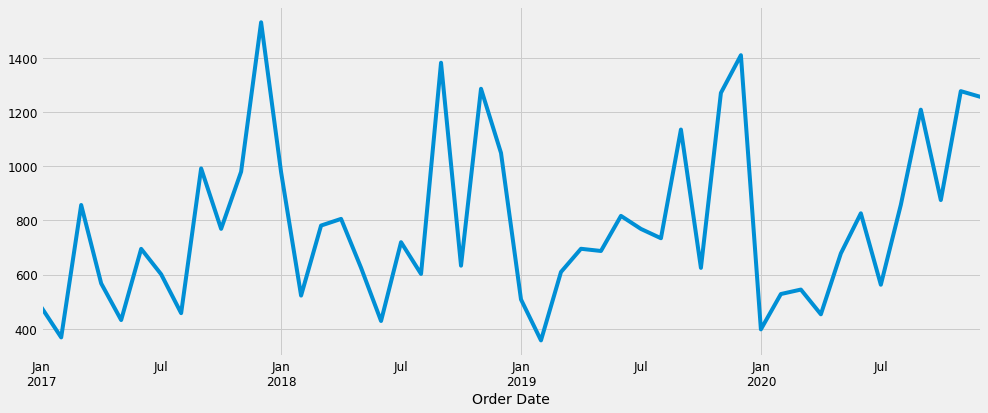

In [97]:
y.plot(figsize=(15, 6))
plt.show()

This time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

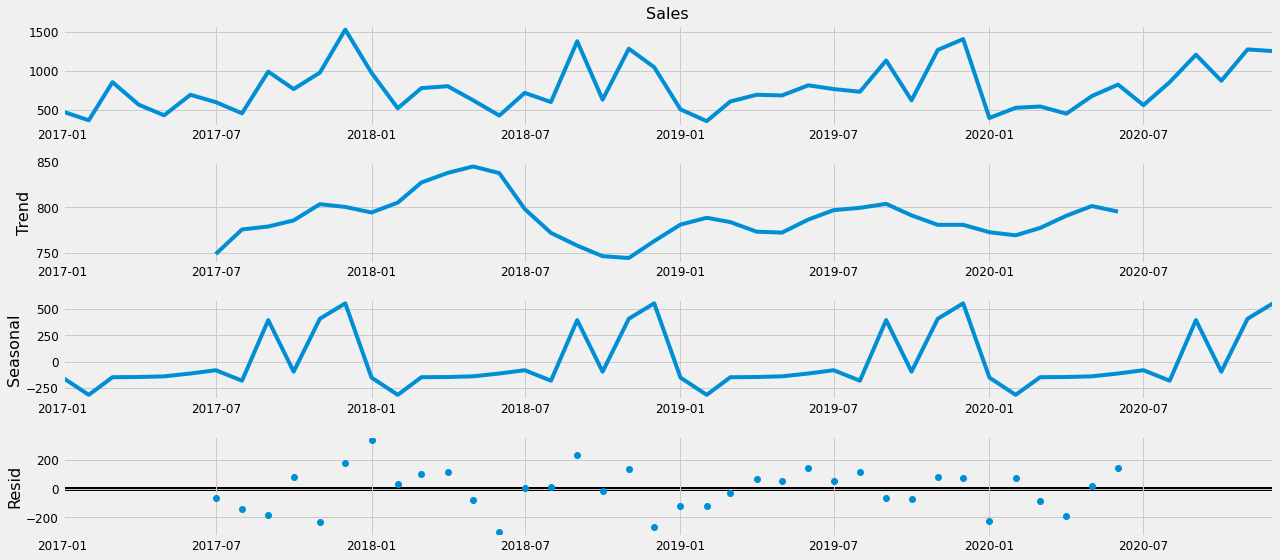

In [101]:
plt.rcParams['figure.figsize'] = 18,8
decomposition = seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()



The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

In [103]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(y)
print('Pvalue of adfuller test is:', adftest[1])

Pvalue of adfuller test is: 9.168756655665738e-06


Reject Null hypothesis,Time series is stationary.

In [104]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

(<Figure size 1296x576 with 1 Axes>,)

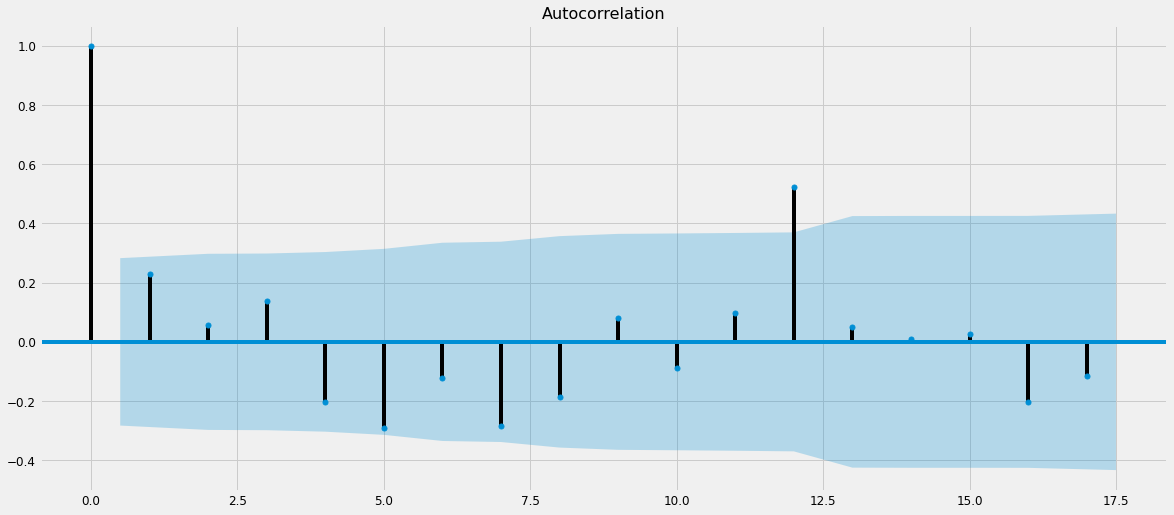

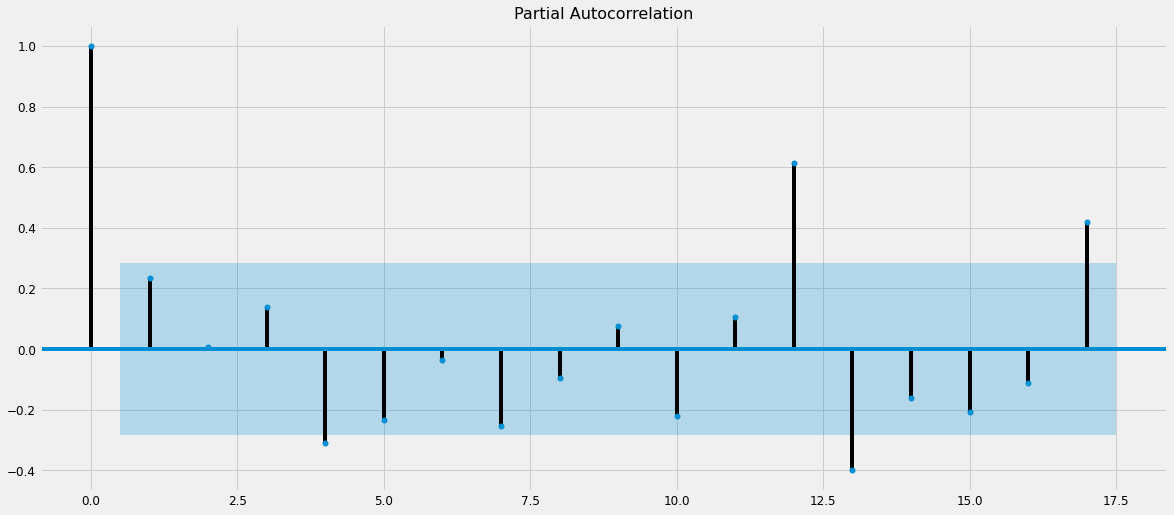

In [105]:
plot_acf(y),
plot_pacf(y),

### Time series forecasting with ARIMA

In [124]:
p = d = q = range(0, 12)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [125]:
import statsmodels.api as sm

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915


C:\Users\Lakmali Gamage\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1549.5546408783391
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:354.78627324098494
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:175.3281816912226
ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(0, 0, 5, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(0, 0, 6, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(0, 0, 7, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(0, 0, 8, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(0, 0, 9, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(0, 0, 10, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(0, 0, 11, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919128
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899929857
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:146.8883465788952
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 1, 4, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(0, 1, 5, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(0, 1, 6, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(0, 1, 7, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(0, 1, 8, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(0, 1, 9, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(0, 1, 10, 12)12 - AIC

C:\Users\Lakmali Gamage\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1194.129041048146
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:309.5603969068772


C:\Users\Lakmali Gamage\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:150.93778851014577
ARIMA(0, 0, 0)x(1, 0, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(1, 0, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(1, 0, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(1, 0, 7, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(1, 0, 8, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(1, 0, 9, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(1, 0, 10, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(1, 0, 11, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280367277
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:148.8399670871512
ARIMA(0, 0, 0)x(1, 1, 3, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(1, 1, 4, 12)12 - AIC:12.0
ARIMA(0, 0, 0)x(1, 1, 5, 12)12 - AIC:14.0
ARIMA(0, 0, 0)x(1, 1, 6, 12)12 - AIC:16.0
ARIMA(0, 0, 0)x(1, 1, 7, 12)12 - AIC:18.0
ARIMA(0, 0, 0)x(1, 1, 8, 12)12 - AIC:20.0
ARIMA(0, 0, 0)x(1, 1, 9, 12)12 - AIC:22.0
ARIMA(0, 0, 0)x(1, 1, 10, 12)12 - AIC:24.0
ARIMA(0, 0, 0)x(1, 1, 11, 12)12 - AIC:26.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:162.12029487165503
ARIM

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.58062317172363

The above output suggests that SARIMAX(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 279.58. Therefore we should consider this to be optimal option.

In [122]:
import pmdarima as pm

In [123]:
pm.auto_arima(
    y,
    trace =True,
    start_p=0,
    error_action= 'ignore',
    suppress_warnings = True,
    seasonal = True,
    m =12

)

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=497.083, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=494.685, Time=0.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=495.371, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=498.718, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=494.603, Time=1.00 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=492.715, Time=0.39 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=492.740, Time=0.10 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=494.612, Time=0.56 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=1.00

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

### Fitting the ARIMA model

In [116]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1 ,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   2004.047     -0.000      1.000   -3928.861    3926.861
ma.S.L12      -3.2476      1.625     -1.999      0.046      -6.432      -0.063
sigma2      2367.6449   4.75e+06      0.000      1.000    -9.3e+06     9.3e+06


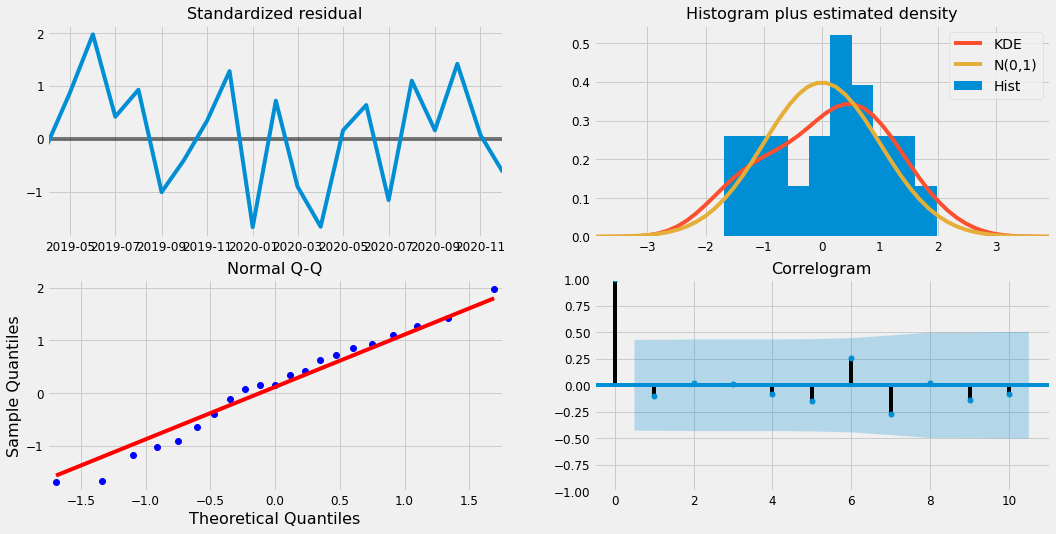

In [117]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

### Validating forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

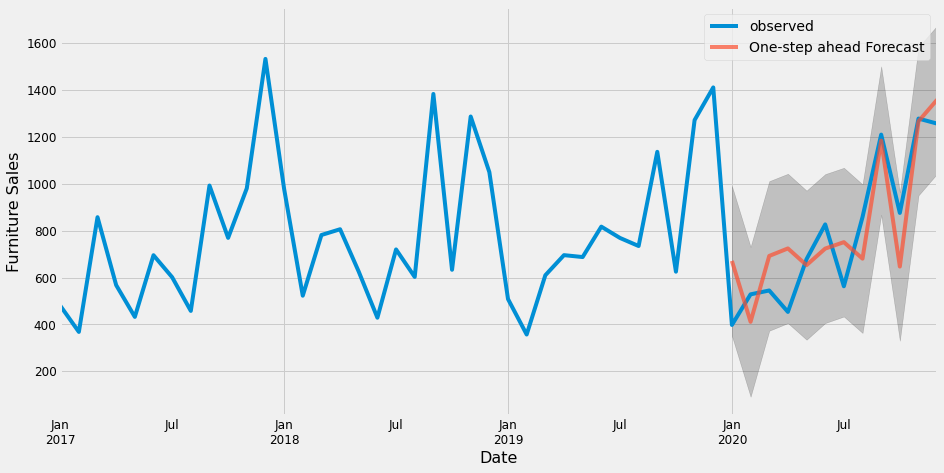

In [118]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [119]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 27089.06


In [120]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 164.59


### Producing and visualizing forecasts

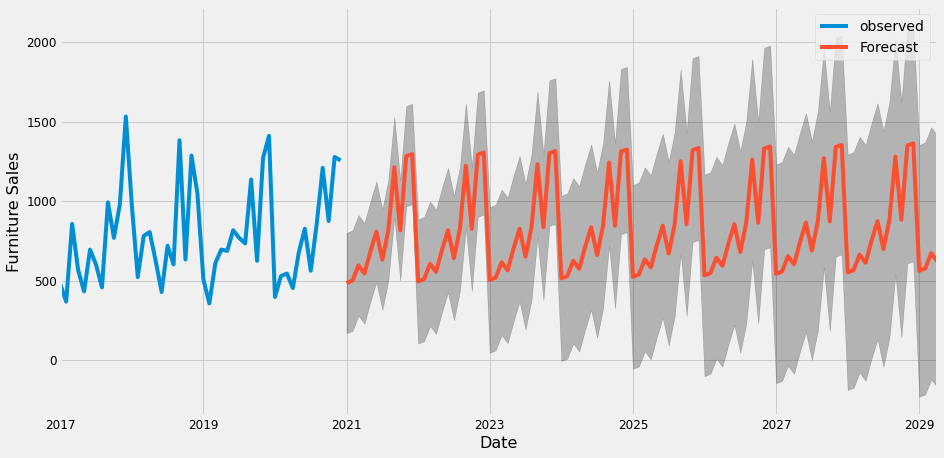

In [121]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()